       Year Harvested Acres            County
0      1980                            Butte 
1      1980                           Colusa 
2      1980                           Fresno 
3      1980                             Kern 
4      1980                            Kings 
5      1980                           Madera 
6      1980                           Merced 
7      1980                      San Joaquin 
8      1980                           Solano 
9      1980                       Stanislaus 
10     1980                           Sutter 
11     1980                           Tulare 
12     1980                             Yuba 
13     1980               0      State Totals
14     1980           31468            Butte 
15     1980                        Calaveras 
16     1980           14000           Colusa 
17     1980            2990     Contra Costa 
18     1980           23992           Fresno 
19     1980            8691            Glenn 
20     1980           61040       

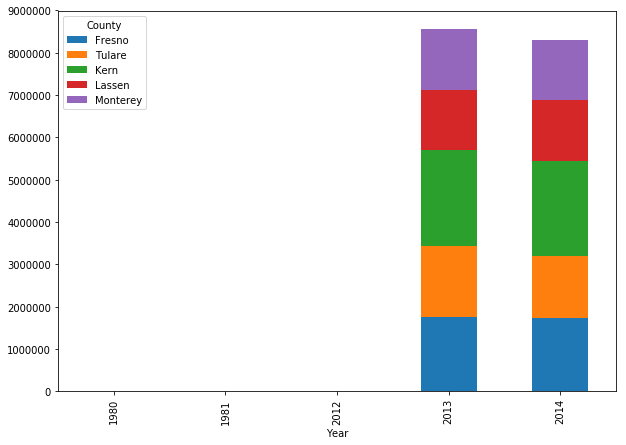

In [74]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

path =r'C:\Users\slalonde\Documents\Personal\DataChallenge\output\CASS'
filenames = glob.glob(path + "\*.csv")

dfs = []
for filename in filenames:
    dfs.append(pd.read_csv(filename))

# Concatenate all csv data into one DataFrame
fullDf = pd.concat(dfs, ignore_index=True)
filterDf = fullDf[['Year','Harvested Acres','County']].dropna(subset=['Harvested Acres']).copy()


plotDf = filterDf.groupby(['Year','County'])['Harvested Acres'].sum().reset_index()
print(filterDf)
pivotDf = plotDf.pivot(index='Year',columns='County', values='Harvested Acres')
pivotDf.loc[:,['Fresno','Tulare', 'Kern', 'Lassen', 'Monterey']].plot.bar(stacked=True, figsize=(10,7))

#plotDf[['Harvested Acres']].plot(kind='bar', stacked=True)

#print(plotDf)
